In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
train = pd.read_csv('C:\\Users\\hp\\Desktop\\sentiment_analysis\\train.csv')
test = pd.read_csv('C:\\Users\\hp\\Desktop\\sentiment_analysis\\test.csv')

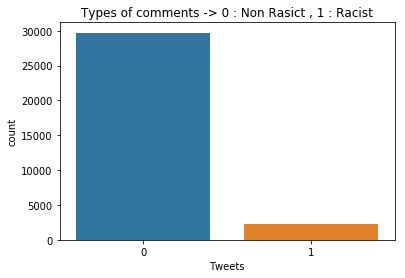

In [3]:
sns.countplot(data=train, x='label')
plt.title('Types of comments -> 0 : Non Rasict , 1 : Racist')
plt.xlabel('Tweets')
plt.show()

In [4]:
print ("Count of Non Racist Tweets in training data =",(len(train[train['label']==0])))
print ("Count of Racist Tweets in training data =",(len(train[train['label']==1])))

Count of Non Racist Tweets in training data = 29720
Count of Racist Tweets in training data = 2242


In [5]:
#combining train and test files
dataset=train.append(test,ignore_index=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [6]:
dataset.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [7]:
dataset.info() #test.csv doesn't contain labels

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
id       49159 non-null int64
label    31962 non-null float64
tweet    49159 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
def remove_pattern(text,pattern):
    line=text.split()
    text=list(line)
    for i in text:
        if i[0]==pattern:
            line.remove(i)
    text=''
    for i in line:
        text=text+i+" "
    return text

In [9]:
dataset['tidy_tweet']=np.vectorize(remove_pattern)(dataset['tweet'],'@')

In [10]:
dataset.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
stop_words=nltk.corpus.stopwords.words('english')

In [12]:
def remove_stopword(text):
    clean_text=" ".join([word for word in text.split() if word not in stop_words])
    return clean_text

In [13]:
dataset['tidy_tweet'] = dataset['tidy_tweet'].apply(lambda x: remove_stopword(x))

In [14]:
tokenize=dataset['tidy_tweet'].apply(lambda x: x.split())

In [15]:
from nltk.stem import PorterStemmer
pstem=PorterStemmer()
tokenize=tokenize.apply(lambda x: [pstem.stem(i) for i in x])

In [16]:
for i in range(len(tokenize)):
    st=''
    for j in range(len(tokenize[i])):
        st=st+tokenize[i][j]+" "
    tokenize[i]=st

In [17]:
dataset['tidy_tweet']=tokenize

In [18]:
dataset.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: societi #motiv


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [20]:
#Using bag of words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
_bow=CountVectorizer(stop_words='english')
bow=_bow.fit_transform(dataset['tidy_tweet'])

In [23]:
X=bow[:len(train),:]
Y=bow[len(train):,:]
x_train,x_valid,y_train,y_valid=train_test_split(X,train['label'],test_size=0.2)

In [24]:
lreg=LogisticRegression()
lreg.fit(x_train,y_train)
pred=lreg.predict(x_valid)

In [25]:
print ('f1_score:',f1_score(y_valid,pred))
print ('Accuracy',lreg.score(x_valid,y_valid)*100)

f1_score: 0.6006006006006006
Accuracy 95.83919912404191


In [26]:
test_pred=lreg.predict(Y)
test['label']=test_pred

In [27]:
test.head()

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0


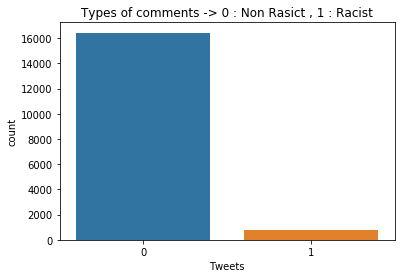

In [28]:
sns.countplot(data=test, x='label')
plt.title('Types of comments -> 0 : Non Rasict , 1 : Racist')
plt.xlabel('Tweets')
plt.show()

In [29]:
print ("Count of Non Racist Tweets in testing data =",(len(test[test['label']==0])))
print ("Count of Racist Tweets in testing data =",(len(test[test['label']==1])))

Count of Non Racist Tweets in testing data = 16436
Count of Racist Tweets in testing data = 761
